## Linear regression model for the sale price of homes


Import the necessary libraries.

In [376]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline


Load all the [data](https://info.kingcounty.gov/assessor/DataDownload/default.aspx) from three tables:
- Real Property Sales 
- Residential Building 
- Parcel 

In [390]:
df = pd.read_csv("processed/residential.csv")

/Users/karenwarmbein/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (31,37,159) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [384]:
df_water = pd.read_csv("processed/waterfront.csv")

Turn strings into integers for the model.
Calculate the age of the house.

In [378]:
df['age'] = 2019 - df['yrbuilt']

## Can we model square foot of living with price?

Create a model with one predictor, for practice.

In [302]:
df_reduced0 = df[['sqfttotliving']]
X = df_reduced0
Y = df['saleprice']
X_scaled = (X - np.mean(X)) / np.std(X)
predictors = sm.add_constant(X_scaled)
predictors = sm.add_constant(X)
model = sm.OLS(np.asarray(Y), predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     1440.
Date:                Thu, 05 Dec 2019   Prob (F-statistic):          3.18e-279
Time:                        11:04:16   Log-Likelihood:                -79881.
No. Observations:                5339   AIC:                         1.598e+05
Df Residuals:                    5337   BIC:                         1.598e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.703e+04   2.28e+04      1.184      0.237   -1.77e+04    7.18e+04
sqfttotliving   377.3949      9.944     37.950      0.000     357.900     396.890
==============================================================================
Omnibus:                     9563.679   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20014205.191
Skew:                          12.660   Prob(JB):                         0.00
Kurtosis:                     301.877   Cond. No.                     5.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

TypeError: unsupported operand type(s) for *: 'type' and 'float'

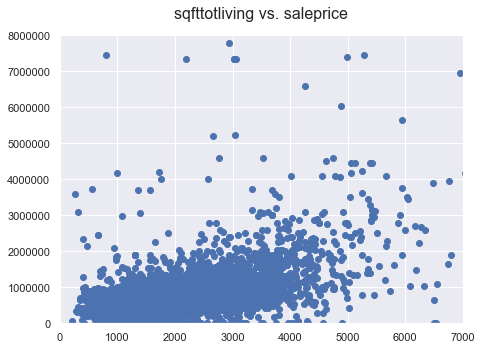

In [303]:
fig = plt.figure(figsize=(7, 5))
fig.suptitle('sqfttotliving vs. saleprice', fontsize=16)
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_xlim([0,7000])
axes.set_ylim([0,8000000])
plt.scatter(df['sqfttotliving'], df['saleprice'])
llist = range(10000)
plt.plot(llist, model.params[0]+list*model.params[1], c='black')
plt.xlabel('sqrtfttotliving', fontsize=14)
plt.ylabel('saleprice', fontsize=14)
plt.show()

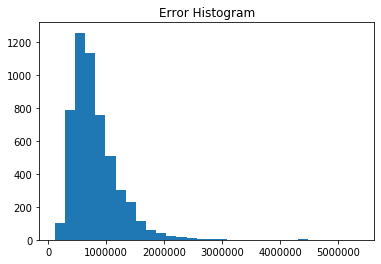

In [10]:
plt.title("Error Histogram")
plt.hist(model.fittedvalues, bins=30); 

## Adding more features to the model
Create a new feature with the total area of a porch.

In [380]:
df_open_plus_closed_porch = df['sqftenclosedporch'] + df['sqftopenporch']

In [381]:
df = pd.concat([df, df_open_plus_closed_porch], axis=1)
df.rename(columns={0:"open_plus_closed_porch"}, inplace=True)

In [ ]:
# df.drop(['open_plus_closed_porch'], axis=1, inplace=True)

Here is the code to make zipcode an integer.

In [306]:
df['zipcode'] = df['zipcode'].astype(str) #cast data as a string
df['zipcode'] = df['zipcode'].str.slice(stop=5) #only use first 5 numbers in zipcode (eliminate 00000-0000)
df['zipcode'] = np.where(df['zipcode'] == ' ' , 0, df['zipcode'])
df['zipcode_int'] = df['zipcode'].astype(int) #cast as integer
df['zipcode_int']

0       98053
1       98042
2       98027
3       98027
4       98038
        ...  
5334    98108
5335    98065
5336    98144
5337    98075
5338    98023
Name: zipcode_int, Length: 5339, dtype: int64

In [382]:
df[df["saleprice"] < 50000].count()
df.shape

(5339, 161)

In [383]:
# Get names of indexes for which column SalePrice has value <1000
indexNames = df[ df['saleprice'] < 50000 ].index
#indexNames = df[ df['saleprice'] > 1700000 ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.shape

(5261, 161)

In [369]:
def ohe_fun(feature, df):
    df2 = df[[feature]]
    
#     onehotencoder = OneHotEncoder()
    data_str_ohe=onehotencoder.fit_transform(df2).toarray()
    df3 = pd.DataFrame(data_str_ohe)
    df = pd.concat([df, df3],axis=1)
    return df

In [386]:
df_water.shape

(5261, 8)

In [385]:
df.shape

(5261, 161)

In [388]:
df_new = pd.concat([df,df_water],axis=1)
df_new

,Unnamed: 0,excisetaxnbr,major,minor,documentdate,saleprice,recordingnbr,volume,ppage,platnbr,...,open_plus_closed_porch,open_plus_closed_porch,Unnamed: 0,wfntlocation_0,wfntlocation_3,wfntlocation_5,wfntlocation_6,wfntlocation_7,wfntlocation_8,wfntlocation_9
0,0.0,2913554.0,102506.0,9159.0,01/30/2018,903500.0,20180205001061,,,,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2946711.0,142205.0,9226.0,08/06/2018,774950.0,20180810000491,,,,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2939591.0,152306.0,9035.0,06/19/2018,685000.0,20180629001964,,,,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2939591.0,152306.0,9035.0,06/19/2018,685000.0,20180629001964,,,,...,40.0,40.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,2924546.0,154580.0,6370.0,04/09/2018,400000.0,20180413001521,,,,...,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,5334.0,2921490.0,754980.0,2457.0,03/26/2018,406000.0,,,,,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5335,5335.0,2943508.0,784920.0,1100.0,07/16/2018,490000.0,20180724001465,,,,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5336,5336.0,2965994.0,812110.0,1360.0,12/10/2018,995000.0,20181213000178,,,,...,110.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5337,5337.0,2941820.0,869130.0,1300.0,07/12/2018,995000.0,20180713001093,,,,...,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [389]:
df = df_new

In [371]:
onehotencoder = OneHotEncoder()

In [372]:
data_str_ohe=onehotencoder.fit_transform(df2).toarray()

In [373]:
data_str_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [374]:
df = pd.concat([df, df3],axis=1)

In [375]:
df

,Unnamed: 0,excisetaxnbr,major,minor,documentdate,saleprice,recordingnbr,volume,ppage,platnbr,...,porch,age,open_plus_closed_porch,0,1,2,3,4,5,6
0,0.0,2913554.0,102506.0,9159.0,01/30/2018,903500.0,20180205001061,,,,...,0.0,42.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2946711.0,142205.0,9226.0,08/06/2018,774950.0,20180810000491,,,,...,0.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2939591.0,152306.0,9035.0,06/19/2018,685000.0,20180629001964,,,,...,0.0,65.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2939591.0,152306.0,9035.0,06/19/2018,685000.0,20180629001964,,,,...,1.0,57.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,2924546.0,154580.0,6370.0,04/09/2018,400000.0,20180413001521,,,,...,0.0,42.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5334,5334.0,2921490.0,754980.0,2457.0,03/26/2018,406000.0,,,,,...,0.0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5335,5335.0,2943508.0,784920.0,1100.0,07/16/2018,490000.0,20180724001465,,,,...,0.0,107.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5336,5336.0,2965994.0,812110.0,1360.0,12/10/2018,995000.0,20181213000178,,,,...,1.0,98.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5337,5337.0,2941820.0,869130.0,1300.0,07/12/2018,995000.0,20180713001093,,,,...,1.0,22.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
df['wfntlocation'].astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
5334    0
5335    0
5336    0
5337    0
5338    0
Name: wfntlocation, Length: 5261, dtype: int64

In [310]:
df = ohe_fun('wfntlocation', df)

In [288]:
df['wfntlocation'].value_counts()

0.0    5101
3.0      49
6.0      41
8.0      29
9.0      27
7.0      11
5.0       3
Name: wfntlocation, dtype: int64

In [260]:
# df.drop(columns=['wfntlocation_0','wfntlocation_3','wfntlocation_6',
#                'wfntlocation_7','wfntlocation_8',
#                'wfntlocation_9',6],inplace=True)

In [311]:

df.rename(columns={0:"wfntlocation_0", 1:"wfntlocation_3", 2:"wfntlocation_5", 
                   3:"wfntlocation_6", 4:"wfntlocation_7", 5:"wfntlocation_8", 6:"wfntlocation_9"}, inplace=True)

In [312]:
df.columns

Index(['Unnamed: 0', 'excisetaxnbr', 'major', 'minor', 'documentdate',
       'saleprice', 'recordingnbr', 'volume', 'ppage', 'platnbr',
       ...
       'age', 'open_plus_closed_porch', 'zipcode_int', 'wfntlocation_0',
       'wfntlocation_3', 'wfntlocation_5', 'wfntlocation_6', 'wfntlocation_7',
       'wfntlocation_8', 'wfntlocation_9'],
      dtype='object', length=168)

In [295]:
df['age']

0        42.0
1        30.0
2        65.0
3        57.0
4        42.0
        ...  
5334     28.0
5335    107.0
5336     98.0
5337     22.0
5338     41.0
Name: age, Length: 5339, dtype: float64

In [323]:
df['sqfttotliving'].value_counts()

1440.0    40
1800.0    38
1530.0    38
1520.0    36
1150.0    35
          ..
6320.0     1
2777.0     1
2736.0     1
460.0      1
4110.0     1
Name: sqfttotliving, Length: 603, dtype: int64

In [332]:
# combinations of predictors

#start with: 'sqfttotliving','open_plus_closed_porch','wfntfootage','trafficnoise'
#r^2 = .277

#'sqfttotliving','open_plus_closed_porch','wfntfootage','trafficnoise','zipcode_int'
#r^2 = .234

#'sqfttotliving','wfntfootage','trafficnoise'
#r^2 = 0.232

#'sqfttotliving','wfntfootage','trafficnoise','bldggrade'
#.271

#'sqfttotliving','wfntfootage','bldggrade','open_plus_closed_porch'
# .272

# list_reduced = ['sqfttotliving','wfntfootage','bldggrade']
#.271

In [464]:

list_reduced = ['sqfttotliving','wfntfootage', 'trafficnoise',
                'bathfullcount','addnlcost','sewersystem','inadequateparking',
                'age','wfntlocation_3','wfntlocation_6','wfntlocation_7','wfntlocation_8','porch']
df_reduced = df[list_reduced]
X = df_reduced
Y = df['saleprice']

# predictors = sm.add_constant(X)

X_scaled = (X - np.mean(X)) / np.std(X)
predictors = sm.add_constant(X_scaled)

model = sm.OLS(np.asarray(Y), predictors).fit()
model.summary()
# print(X.sample(5))
# print(f"mean = {Y.mean()}")
# print(f"median = {Y.median()}")
# print(f"mode = {Y.mode()}")
# print(f"stand dev = {Y.std()}")
# model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     265.5
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:35:34   Log-Likelihood:                -78018.
No. Observations:                5261   AIC:                         1.561e+05
Df Residuals:                    5247   BIC:                         1.562e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.096e+05   9207.601     87.928      0.000    7.92e+05    8.28e+05
sqfttotliving      3.918e+05   1.18e+04     33.268      0.000    3.69e+05    4.15e+05
wfntfootage        6.512e+04   1.18e+04      5.503      0.000    4.19e+04    8.83e+04
trafficnoise       1.112e+04   9313.638      1.194      0.233   -7137.959    2.94e+04
bathfullcount     -1.527e+04   1.15e+04     -1.324      0.186   -3.79e+04    7343.868
addnlcost         -8067.6022   9673.900     -0.834      0.404    -2.7e+04    1.09e+04
sewersystem        1.035e+05   9574.065     10.814      0.000    8.48e+04    1.22e+05
inadequateparking  2.318e+04   9250.578      2.506      0.012    5046.670    4.13e+04
age                 3.47e+04   1.02e+04      3.406      0.001    1.47e+04    5.47e+04
wfntlocation_3    -4532.6710   1.06e+04     -0.428      0.669   -2.53e+04    1.62e+04
wfntlocation_6     3.037e+05   9825.185     30.914      0.000    2.84e+05    3.23e+05
wfntlocation_7      6.83e+04   9430.399      7.242      0.000    4.98e+04    8.68e+04
wfntlocation_8    -2.854e+04      1e+04     -2.851      0.004   -4.82e+04   -8912.905
porch              1.808e+04   9562.007      1.891      0.059    -663.946    3.68e+04
==============================================================================
Omnibus:                     8882.401   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16032575.867
Skew:                          11.133   Prob(JB):                         0.00
Kurtosis:                     272.523   Cond. No.                         2.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

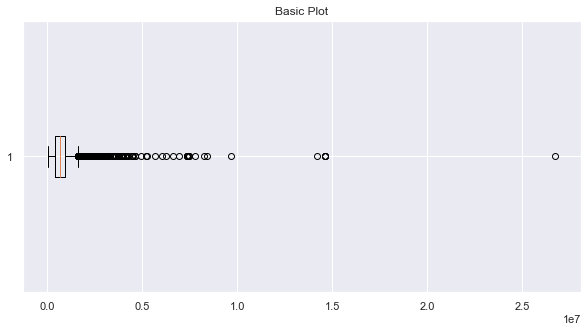

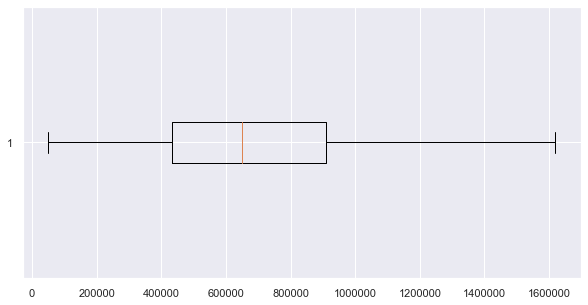

In [271]:
#create a boxplot of saleprice to see outliers
#outliers above 1.6 million

fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title('Basic Plot')
ax1.boxplot(Y, vert=False);
fig2, ax2 = plt.subplots(figsize=(10,5))
ax2.boxplot(Y, vert=False, showfliers=False);


In [202]:
#total: 5339
sum(Y < 1700000)


4991

In [465]:
df_test = pd.concat([df_reduced, df['saleprice']], axis=1)

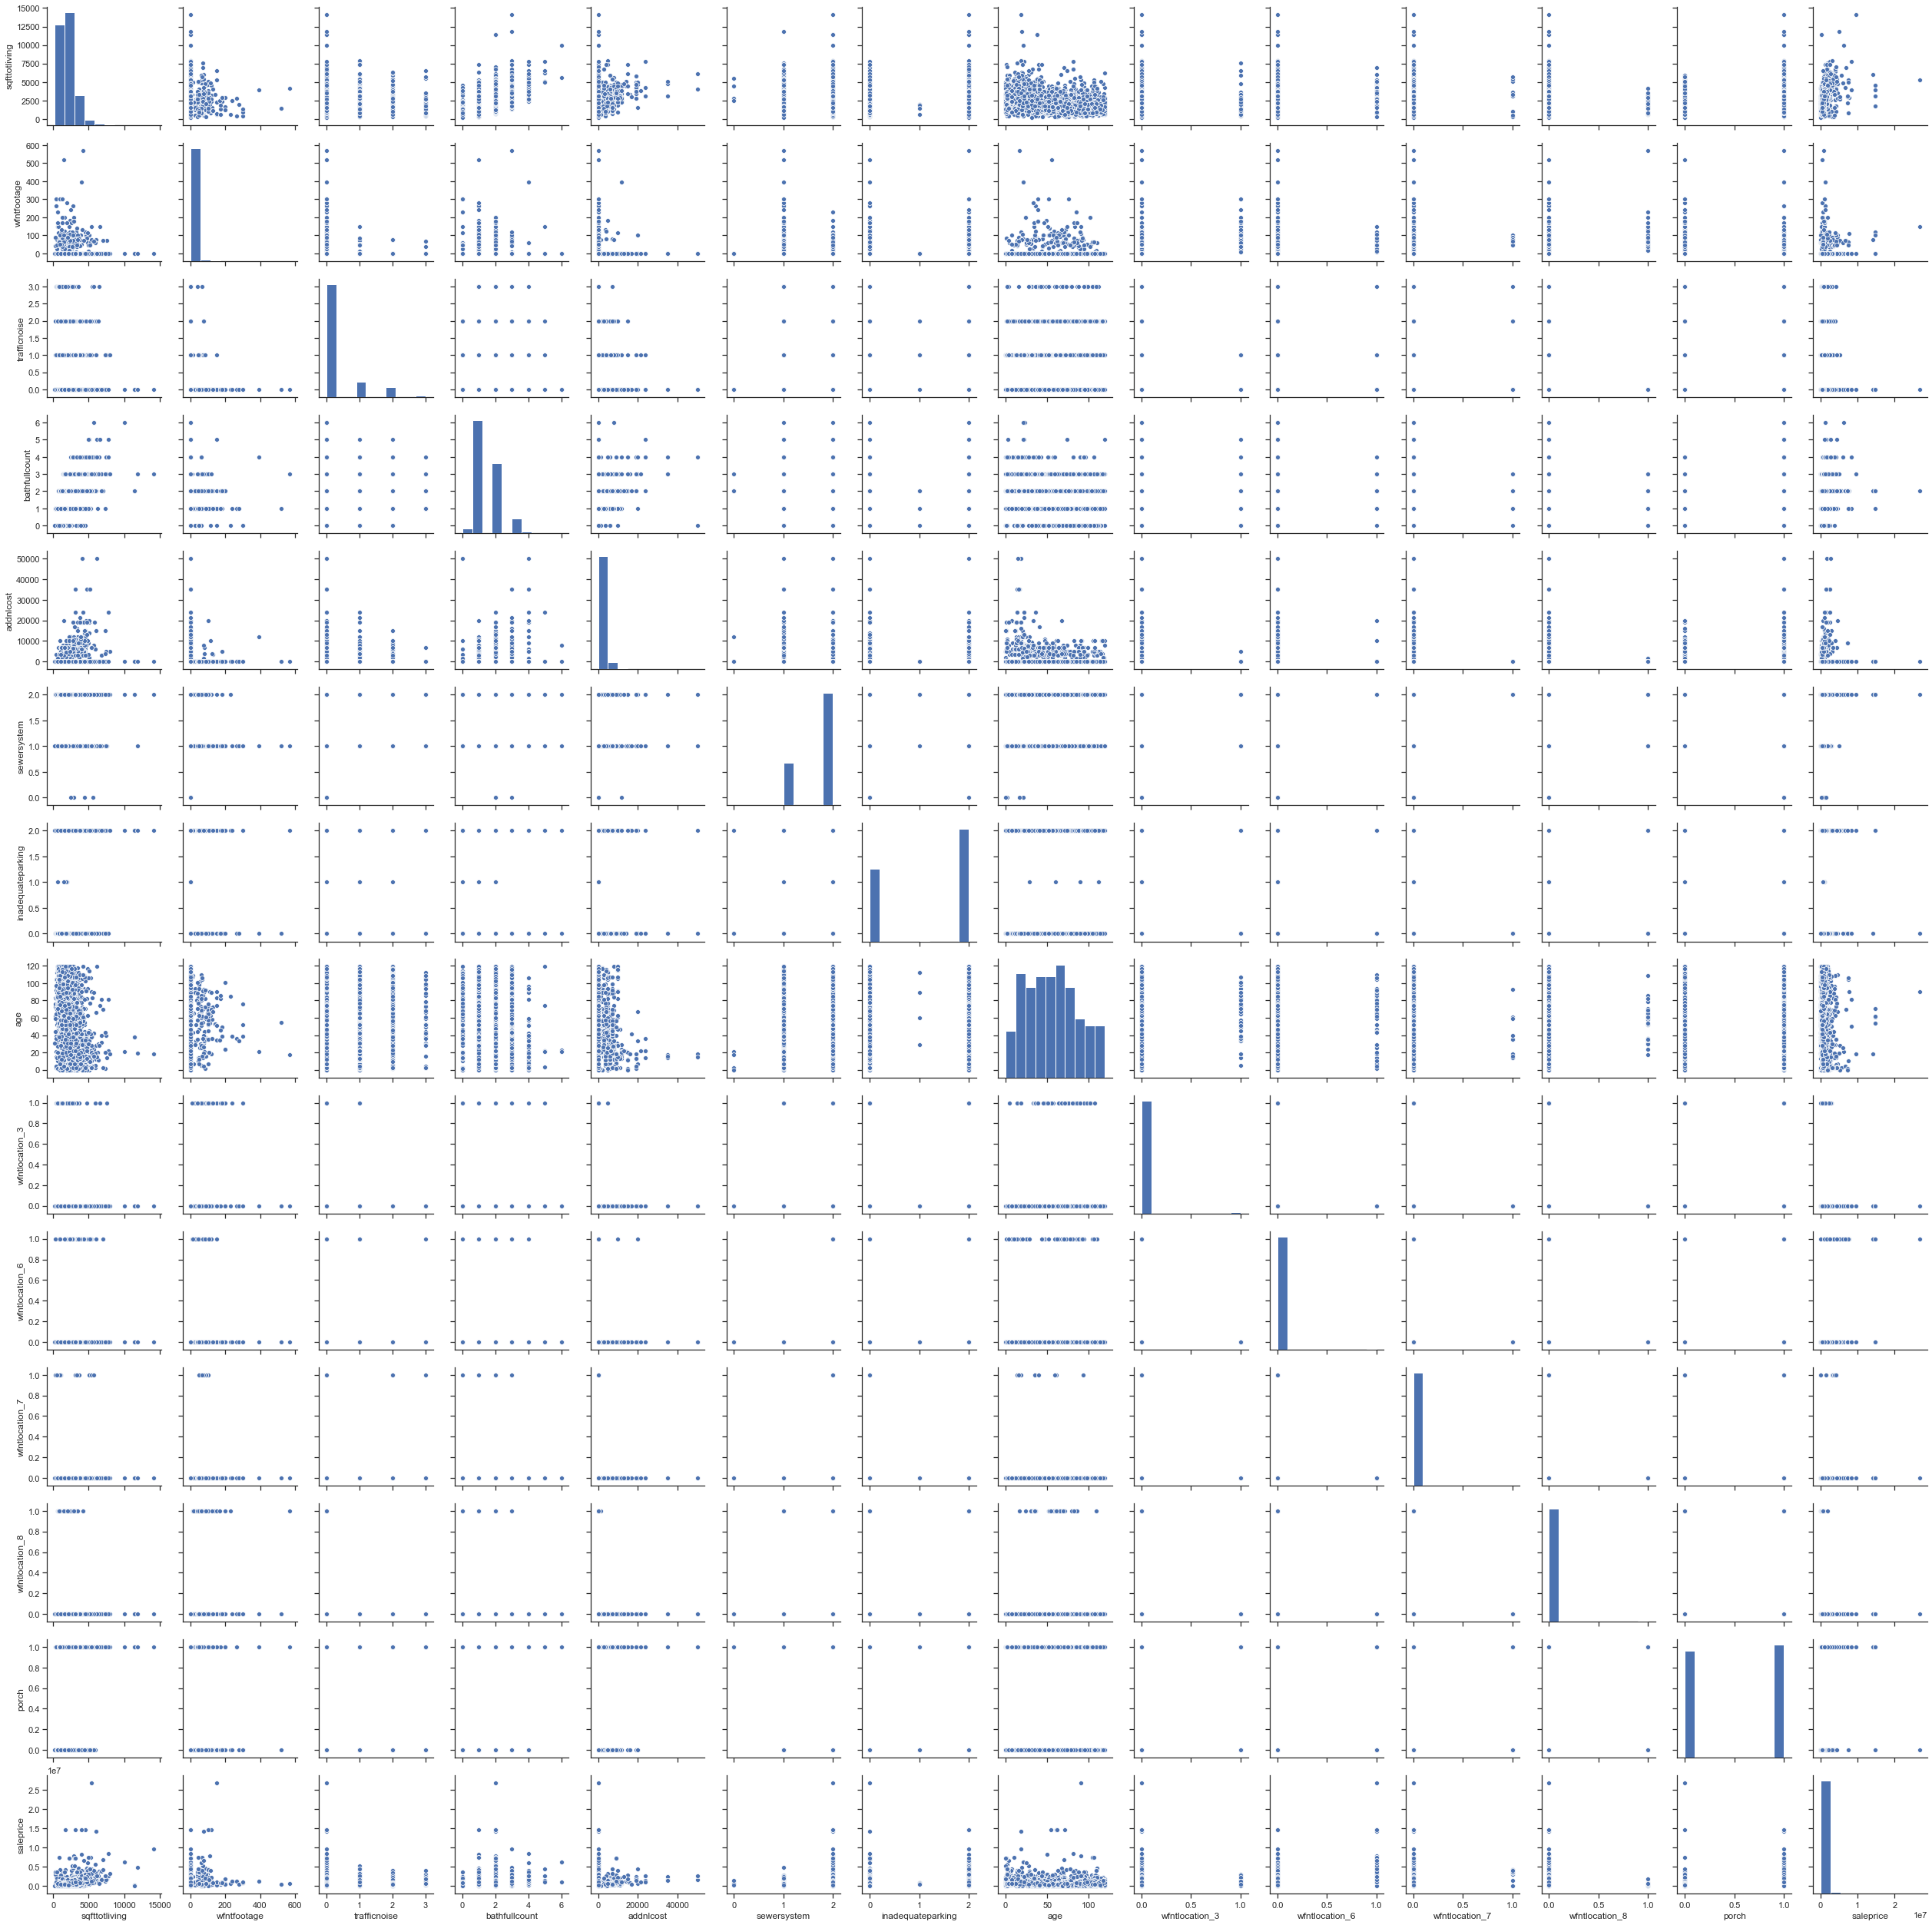

In [455]:
sns.set(style="ticks");
sns.pairplot(df_test)

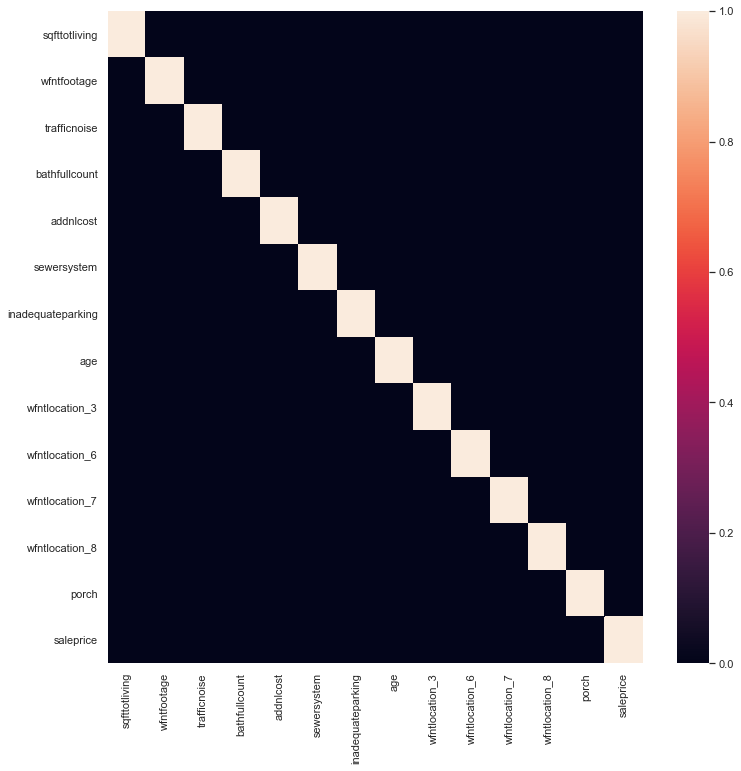

In [466]:
sns.set(rc={'figure.figsize':(12, 12)})
# sns.heatmap(df_test.corr(), annot=True);
corr_high = abs(df_test.corr()) > .7
sns.heatmap(corr_high)
#all our features are independent, none have a high correlation
#In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor 
#variable in a multiple regression model can be linearly predicted from the others with a 
#substantial degree of accuracy.

# Found that building grade and square feet of living were highly correlated, so we removed building grade from our model

In [ ]:
#Check the model for:
# Linearity
# - normality of the error distribution (done)
# - multicollinearity, (done)
# - linear with respect to the outcome variable

In [467]:
y_hat = model.fittedvalues
error = y_hat - Y
error.min(), error.max(), np.sum(error.values < 0.25), len(error.values)

(-20800421.80397312, 4458129.1836242955, 2412, 5261)

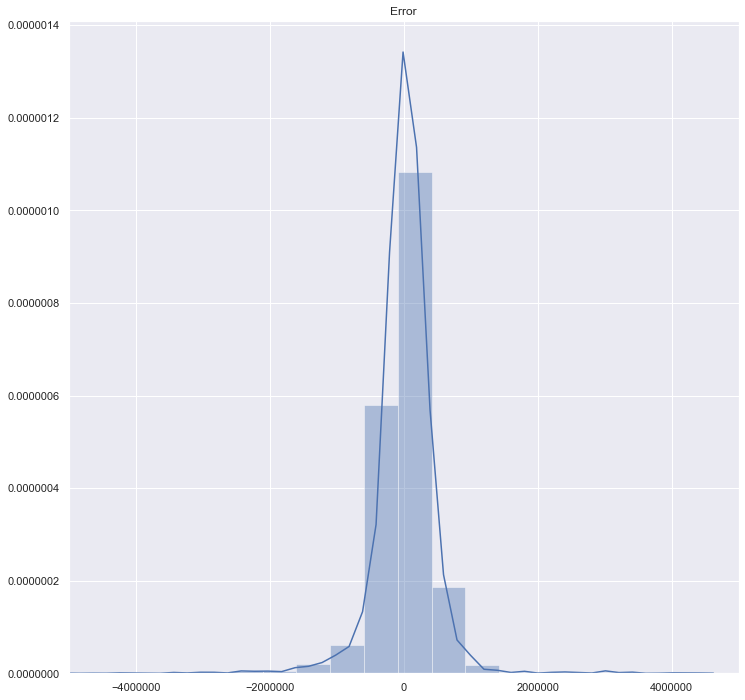

In [468]:
# - normality of the error distribution
sns.distplot(error)
plt.title('Error')
plt.xlim(-.5e7,.5e7);

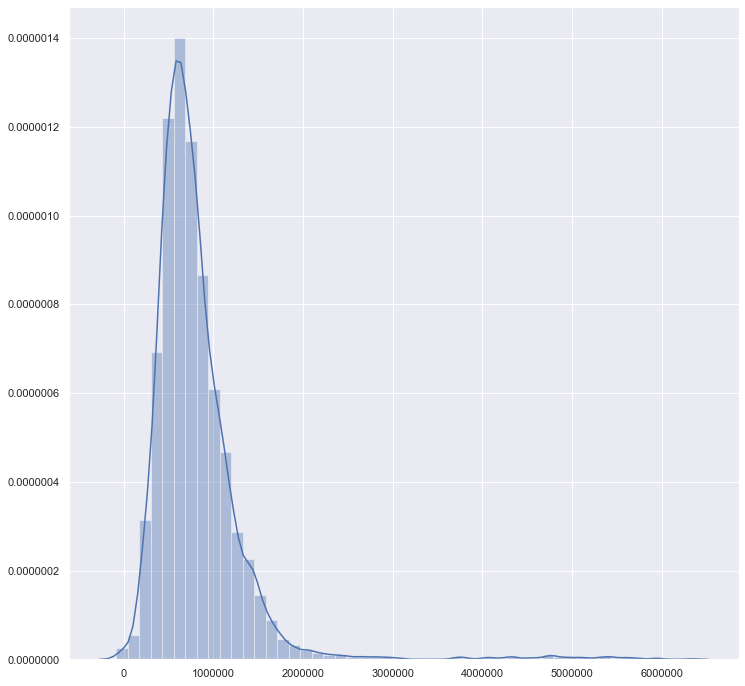

In [469]:
sns.distplot(y_hat)

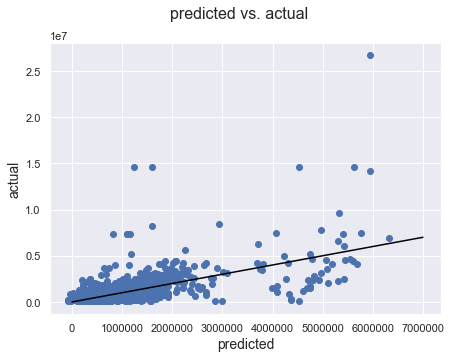

In [475]:
#linear with respect to the outcome variable
fig = plt.figure(figsize=(7, 5))
fig.suptitle('predicted vs. actual', fontsize=16)
# axes= fig.add_axes([0.1,0.1,0.8,0.8])
# axes.set_xlim([0,7000])
# axes.set_ylim([0,8000000])
plt.scatter(y_hat, Y)
llist = range(7000000)
plt.plot(llist, llist, c='black')
plt.xlabel('predicted', fontsize=14)
plt.ylabel('actual', fontsize=14)
plt.show()

In [ ]:
df['bldggrade'].astype('category').values

In [ ]:
df['wfntfootage'].max(),df['wfntfootage'].min(), df['wfntfootage'].mean() 

To: Stakeholders in King County, WA
From: Karen Warmbein and Yu Fen Lin
RE: Housing Saleprice Claims

Many factors influence the saleprice of homes. According to research (cited below) square footage, porches, and waterfront property increases a home's sale price. 

We created a model of the saleprice of a house by using three predictors - square footage, waterfront footage,'and the grade of a building. The definitions from  follow:

Square footage: the area of a house
Waterfront footage: Max value 570 
Building grade: Represents the construction quality of improvements. Grades run from grade 3 to 13 in our data. (here)[https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r]


-Does higher square footage increases home sale price?
Yes, we dermined that the square footage of a home is directly correlated with the saleprice.

-Does having a porch increases home sale price?
We can't say! From our model, the porch size was moderatly correlated with the size of the home (or, the square footage of the home). In other words, one is dependent on the other so we could not use this as a predictor in the model.

-Having a beachfront or lakefront increases home sale price

_____
Citations
Gomez, J. 2019. "8 critical factors that influence a home’s value". OpenDoor. Available at: https://www.opendoor.com/w/blog/factors-that-influence-home-value
Buczynski, B. 2019. "5 Proven Ways to Increase Home Value". NerdWallet. Available at: https://www.nerdwallet.com/blog/mortgages/how-to-increase-home-value/
Taylor, A.B. 2019. "11 Features That Will Sell Your Home Faster". Kiplinger. Available at: https://www.kiplinger.com/slideshow/real-estate/T010-S001-home-features-today-s-buyers-want-most/index.html
Crow, S. 2019. "50 Clever Ways to Instantly Add Value to Your Home". BestLife. Available at: https://bestlifeonline.com/home-value-upgrades/
Unknown author. 2018. "5 Features That Make A Property Valuable". House Flipping School. Available at: https://houseflippingschool.com/5-features-valuable/